In [0]:
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import librosa
from librosa import display
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob 
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import *
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
path_ = 'gdrive/My Drive/DT2119 Speech Speaker Recognition/Project/'
data_actor_all = np.load(path_+"Data_Actor_All_40.npy", allow_pickle=True)
mfccs, label_emotions, label_actors = zip(*data_actor_all)

In [0]:
#Loading the data and splitting it into training and test

emotion_female = []
mfcc_female = []

emotion_male = []
mfcc_male = []

for i in range (len(label_actors)):
  if (label_actors[i] % 2) == 0:
    emotion_female.append(label_emotions[i])             #for female 0
    mfcc_female.append(mfccs[i])
  else:
    emotion_male.append(label_emotions[i])             #for female 0
    mfcc_male.append(mfccs[i])


In [0]:
X = np.asarray(mfcc_female)
Y = np.asarray(emotion_female)
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.10, shuffle = True, random_state = 60)
Xtr, Xval, Ytr, Yval = train_test_split(Xtr, Ytr, test_size=0.20, shuffle = True, random_state = 60)


Xtr = np.expand_dims(Xtr, axis=2)
Xtst = np.expand_dims(Xtst, axis=2)
Xval = np.expand_dims(Xval, axis=2)


In [0]:
print(X.shape)
print(Xtr.shape)
print(Ytr.shape)
print(Xval.shape)
print(Yval.shape)
print(Xtst.shape)
print(Ytst.shape)

(720, 40)
(518, 40, 1)
(518,)
(130, 40, 1)
(130,)
(72, 40, 1)
(72,)


In [0]:
model = models.Sequential()
model.add(layers.Conv1D(128, 8,padding='same',
                 input_shape=(Xtr.shape[1],1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(5)))
model.add(layers.Conv1D(256, 8,padding='same',))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(5)))
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8))
model.add(layers.Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 40, 128)           1152      
_________________________________________________________________
activation_5 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 256)            262400    
_________________________________________________________________
activation_6 (Activation)    (None, 8, 256)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(lr=0.00003), metrics=['accuracy'])
cnnhistory=model.fit(Xtr, Ytr, batch_size=16, epochs=500, validation_data=(Xval, Yval)) 

Epoch 1/500
33/33 [==============================] - 1s 30ms/step - loss: 7.5166 - accuracy: 0.1467 - val_loss: 2.5334 - val_accuracy: 0.1615
Epoch 2/500
33/33 [==============================] - 1s 20ms/step - loss: 4.8789 - accuracy: 0.1255 - val_loss: 2.2665 - val_accuracy: 0.1692
Epoch 3/500
33/33 [==============================] - 1s 20ms/step - loss: 3.4466 - accuracy: 0.1467 - val_loss: 2.1228 - val_accuracy: 0.1769
Epoch 4/500
33/33 [==============================] - 1s 20ms/step - loss: 2.9035 - accuracy: 0.1757 - val_loss: 2.0758 - val_accuracy: 0.1385
Epoch 5/500
33/33 [==============================] - 1s 20ms/step - loss: 2.5044 - accuracy: 0.1506 - val_loss: 2.1677 - val_accuracy: 0.2077
Epoch 6/500
33/33 [==============================] - 1s 20ms/step - loss: 2.2721 - accuracy: 0.1892 - val_loss: 1.9506 - val_accuracy: 0.2538
Epoch 7/500
33/33 [==============================] - 1s 20ms/step - loss: 2.1679 - accuracy: 0.1988 - val_loss: 2.2256 - val_accuracy: 0.1692
Epoch 

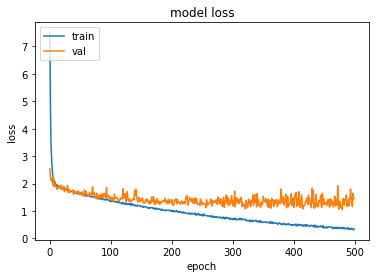

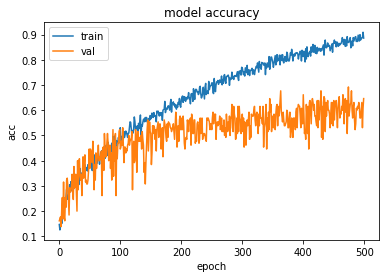

In [0]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(Xtst, Ytst, verbose=2)

3/3 - 0s - loss: 1.3087 - accuracy: 0.5833


In [0]:
predictions = model.predict_classes(Xtst)
arrayyy=confusion_matrix(Ytst, predictions)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


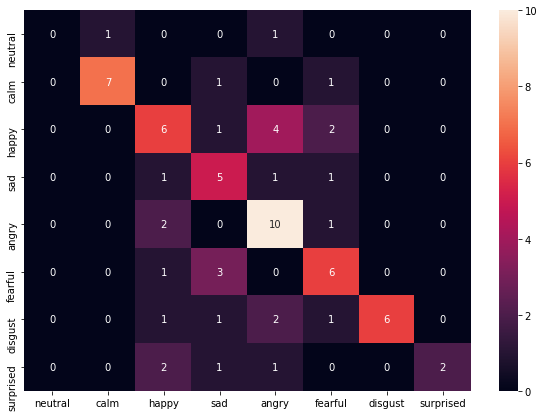

In [0]:
# Plot non-normalized confusion matrix
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix

class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

df_cm = pd.DataFrame(arrayyy, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)